In [1]:
#Importing Packages

import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/jee-marks-and-rank/Updated_JEE_mark_vs_rank.xlsx


## **Loading the data**

In [2]:
data=pd.read_excel("../input/jee-marks-and-rank/Updated_JEE_mark_vs_rank.xlsx")
data.to_csv("Input.csv",header=True)
df=pd.DataFrame(data)

## **Data Analysing**

In [3]:
df.head()

,MARKS,RANK
0,310,1
1,290,101
2,270,201
3,255,501
4,247,1001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MARKS   121 non-null    int64
 1   RANK    121 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [5]:
df.loc[0]

MARKS    310
RANK       1
Name: 0, dtype: int64

In [6]:
df.corr()

,MARKS,RANK
MARKS,1.000000,-0.590798
RANK,-0.590798,1.000000


In [7]:
print(df)

     MARKS     RANK
0      310        1
1      290      101
2      270      201
3      255      501
4      247     1001
..     ...      ...
116     87    92303
117     41   326517
118     61   173239
119      1  1025009
120     40   334080

[121 rows x 2 columns]


## **Data Cleaning** 

In [8]:
df.loc[[58,59]]


,MARKS,RANK
58,108,182200
59,101,182200


No two students can have same ranks, so we need to remove one row.

In [9]:
df.drop(59,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MARKS   120 non-null    int64
 1   RANK    120 non-null    int64
dtypes: int64(2)
memory usage: 2.8 KB


## **Data Visualization**

<AxesSubplot: xlabel='MARKS', ylabel='RANK'>

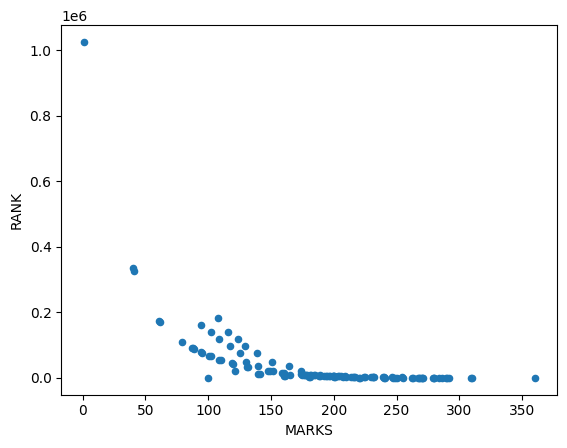

In [11]:
df.plot(kind="scatter",x="MARKS",y="RANK")

## **Train Test Split**

In [12]:
X=df.drop("RANK",axis=1)
y=df["RANK"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=60)

## **Training and Testing models**

### **Linear Regression**

In [14]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)
predictions1=model1.predict(X_test)

### **Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(max_iter=100)
model2.fit(X_train,y_train)
predictions2=model2.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Randomn Forest Regression**

In [16]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_train,y_train)
predictions3=model3.predict(X_test).round()

### **Support Vetor Regression**

In [17]:
from sklearn.svm import SVR
model4 = SVR(C=100000)
model4.fit(X_train,y_train)
predictions4=model4.predict(X_test).round()

## **Evaluation Metrices**

In [18]:
print("Linear Regression score :",model1.score(X_test,y_test))
print("Logistic Regression score :",model2.score(X_test,y_test))
print("Randomn Forest Regression score :",model3.score(X_test,y_test))
print("Support Vector Regression score :",model4.score(X_test,y_test))

Linear Regression score : 0.3881201181643521
Logistic Regression score : 0.0625
Randomn Forest Regression score : 0.785476645350431
Support Vector Regression score : 0.7241326224508045


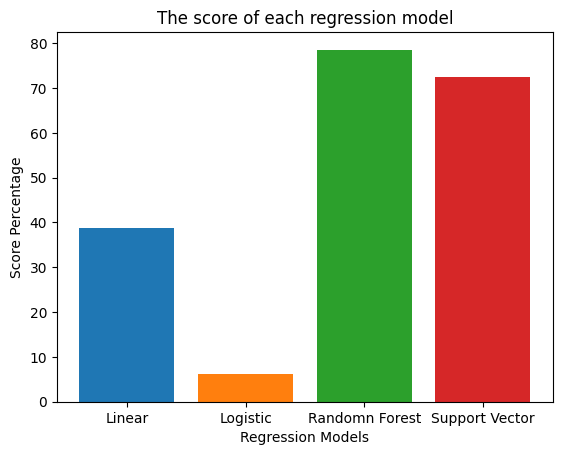

In [19]:
plt.figure()
plt.bar(height=model1.score(X_test,y_test)*100,x="Linear")
plt.bar(height=model2.score(X_test,y_test)*100,x="Logistic")
plt.bar(height=model3.score(X_test,y_test)*100,x="Randomn Forest")
plt.bar(height=model4.score(X_test,y_test)*100,x="Support Vector")
plt.title("The score of each regression model")
plt.xlabel("Regression Models")
plt.ylabel("Score Percentage")
plt.show()